Por Alex Wicher, estudiante de la Facultad de Matemática, Astronomía, Física y Computación (FAMAF) para el laboratorio de Redes y Sistemas Distribuidos.

# Analisis de control de flujo y congestión, capa de transporte.

## Resumen.

En este trabajo se presentaran algoritmos de control de flujo y control de congestión para la capa de transporte, por lo tanto, implementados en el nodo emisor y el nodo receptor (Procesos en dos maquinas comunicándose). La idea es maximizar la utilización de la sub-red sin perder segmentos usando estos algoritmos. Se van a comparar métricas con y sin los algoritmos que voy a proponer para notar la diferencia en utilización de buffers , segmentos perdidos, emitidos y recibidos , junto con observaciones sobre las mismas y consideraciones a tener en cuenta.


## Introducción.

En la mayoría de los sistemas operativos de redes existe la capa de transporte la cual se encarga de la comunicación entre dos procesos. Esta misma abstrae los detalles de la sub-red, la cual puede tener nodos intermediarios lentos, causando perdida de segmentos por congestión. Luego puede ocurrir en un nodo receptor, que este no puedo procesar los segmentos mas rápido de lo que los recibe, dando así un problema de flujo, causando eventualmente perdida de segmentos.
Para solucionar esto se utilizan algoritmos de control de flujo y control de congestión, estos se implementan en el nodo emisor y en el receptor. Por lo tanto la perdida de paquetes generalmente se asume que es por problemas de congestión, ya que el nodo receptor se puede monitorear , mientras que los intermediarios no.

El escenario general de este laboratorio consiste del nodo emisor y receptor, un nodo intermediario ,representando la subred, queue(Cola) que conecta al emisor y receptor ,y un canal de control entre el emisor y receptor.

<img src="data/intro.png" width="800" height="400">

* Los datarates y retardos de propagación dependen de los dos casos de laboratorio que se presentan.
+ Caso 1: cuello de botella en el receptor, consumo de paquetes mas bajo que su recibimiento. (Flujo).
+ Caso 2: cuello de botella en la entrada de queue(Intermediario entre emisor y receptor) , emisor satura al intermediario. (Congestión).
Los tamaños de buffer son de 200 paquetes. El emisor tiene un buffer muy grande por que se asume que la emisión de paquetes es controlado por la aplicación.

## Métodos.

Mi enfoque va a ser en métodos simples de entender e implementar, y distintos a usados por TCP visto en el teórico.

### Control de flujo

Simplemente cuando la utilización de buffer del receptor es mayor a EMERGENCY_PERCENT_BUFF (96%) se envían paquetes de emergencia de flujo por el canal de control.
El emisor lo recibe y este introduce un retardo acumulable en el envió de sus paquetes de FLOW_DELAY_RATE (0.025s) durante un tiempo de FLOW_TIMER(10s) el cual se re-establece cada vez que llega un paquete de emergencia de flujo.

### Control de congestión

El emisor lleva cuenta de los paquetes que envió al receptor, y el receptor cuenta los paquetes que recibió del emisor.
Cada STATUS_PKT_TIMER (0.6s) el receptor enviá un paquete de control por el canal de control con su tamaño de buffer, paquetes recibidos, y utilización en cantidad de paquetes.
El emisor recibe el paquete de control y calcula la diferencia entre paquetes enviados y los paquetes recibidos indicados por el paquete de control. Si esta diferencia es mayor a CONGESTION_PKTS_DIFF_TOLERANCE(85 paquetes) entonces se inicializa un temporizador CONGESTION_TIMER(10s) y se agrega un retardo acumulable a la emisión de CONGESTION_DELAY_RATE(0.025s).
El temporizador de congestión se re-establece si llega otro paquete de control y si cumple la condición indicada anteriormente.

Cambien existe un mecanismo de seguridad que elimina el retardo introducido por el control de flujo cuando se detecta que el receptor tiene un buffer con menos de MIN_FAILSAFE_BUFFERSIZE_FLOW (45 paquetes) indicado por el paquete de control. Esto es por si se calibra mal el temporizador o el retardo acumulable.
Para el control de congestión no existe este mecanismo pero la implementación del mismo seria recomendable y muy similar, eliminando los retardos inducidos por congestión en base a una diferencia de paquetes emitidos y recibidos chica, tal vez 30 paquetes para el escenario de laboratorio.


## Resultados.

## Caso1: Flujo

In [170]:
#Configuracion inicial
import matplotlib.pyplot as plt  #librería para graficas de python
import numpy  # extiende las librerias de matemática de python
import pandas  #libreria para procesamiento de datos muy usada en la industria
import seaborn  # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

dataOld = pandas.read_csv('data/lab3_case1_1.csv')
dataNew = pandas.read_csv('data/lab3_case1_2.csv')

dataOld


,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,datetime,20220802-08:12:10,NaN,NaN
2,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,datetimef,20220802-081210,NaN,NaN
3,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20220802-08:12:10-61960,runattr,NaN,NaN,network,Network,NaN,NaN


In [171]:
dataNew


,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,datetime,20220730-16:27:35,NaN,NaN
2,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,datetimef,20220730-162735,NaN,NaN
3,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20220730-16:27:35-21796,runattr,NaN,NaN,network,Network,NaN,NaN


### No se perdio ningun paquete con el algoritmo de control de flujo.

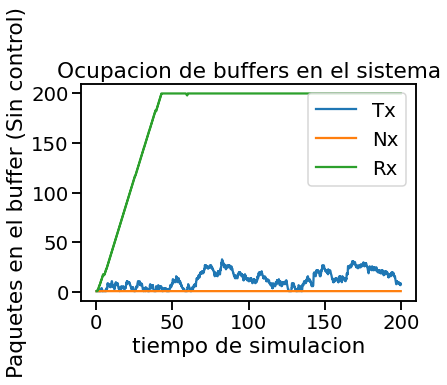

In [172]:
time_genO = dataOld['vectime'].loc[[24]].tolist()
buffer_genO = dataOld['vecvalue'].loc[[24]].tolist()

time_queueO = dataOld['vectime'].loc[[25]].tolist()
buffer_queueO = dataOld['vecvalue'].loc[[25]].tolist()

time_sinkO = dataOld['vectime'].loc[[26]].tolist()
buffer_sinkO = dataOld['vecvalue'].loc[[26]].tolist()

time_genO = list(map(float, (time_genO[0]).split()))
time_queueO = list(map(float, (time_queueO[0]).split()))
time_sinkO = list(map(float, (time_sinkO[0]).split()))
buffer_genO = list(map(float, (buffer_genO[0]).split()))
buffer_queueO = list(map(float, (buffer_queueO[0]).split()))
buffer_sinkO = list(map(float, (buffer_sinkO[0]).split()))

figure, axis = plt.subplots(1, 1)
plt.plot(time_genO, buffer_genO, color='tab:blue', label="Tx")
plt.plot(time_queueO, buffer_queueO, color='tab:orange', label="Nx")
plt.plot(time_sinkO, buffer_sinkO, color='tab:green', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Paquetes en el buffer (Sin control)")
plt.legend()
plt.show()



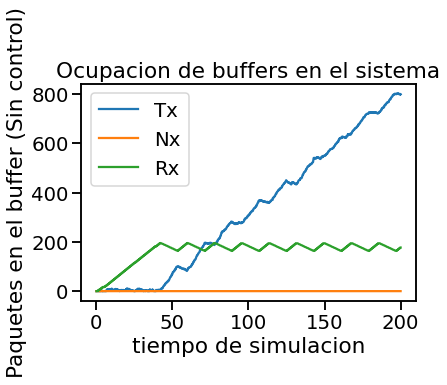

In [173]:
time_genN = dataNew['vectime'].loc[[24]].tolist()
buffer_genN = dataNew['vecvalue'].loc[[24]].tolist()

time_queueN = dataNew['vectime'].loc[[25]].tolist()
buffer_queueN = dataNew['vecvalue'].loc[[25]].tolist()

time_sinkN = dataNew['vectime'].loc[[26]].tolist()
buffer_sinkN = dataNew['vecvalue'].loc[[26]].tolist()

time_genN = list(map(float, (time_genN[0]).split()))
time_queueN = list(map(float, (time_queueN[0]).split()))
time_sinkN = list(map(float, (time_sinkN[0]).split()))
buffer_genN = list(map(float, (buffer_genN[0]).split()))
buffer_queueN = list(map(float, (buffer_queueN[0]).split()))
buffer_sinkN = list(map(float, (buffer_sinkN[0]).split()))

figure, axis = plt.subplots(1, 1)
plt.plot(time_genN, buffer_genN, color='tab:blue', label="Tx")
plt.plot(time_queueN, buffer_queueN, color='tab:orange', label="Nx")
plt.plot(time_sinkN, buffer_sinkN, color='tab:green', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Paquetes en el buffer (Sin control)")
plt.legend()
plt.show()

### El emisor guarda sus mensajes cada vez que se introduce un retardo en la emision maxima de paquetes, el buffer del receptor siempre evita tocar el limite.

1979
998
770


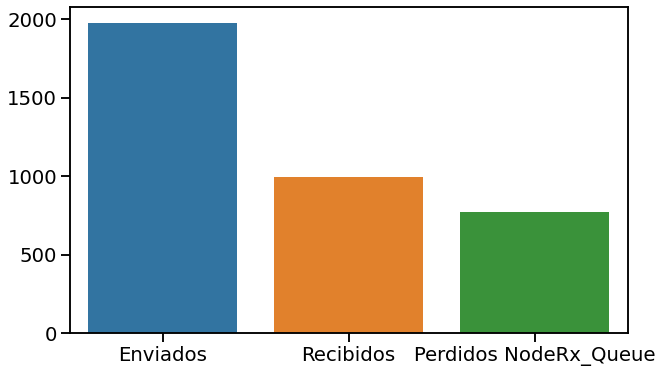

In [174]:
time_genO = dataOld['vectime'].loc[[23]].tolist()
packets_genO = dataOld['vecvalue'].loc[[23]].tolist()
time_sinkO = dataOld['vectime'].loc[[28]].tolist()
packets_sinkO = dataOld['vecvalue'].loc[[28]].tolist()

time_nodeRx_queueO = dataOld['vectime'].loc[[29]].tolist()
lost_nodeRx_queueO = dataOld['vecvalue'].loc[[29]].tolist()

#dividiendo en listas
time_genO = list(map(float, time_genO[0].split()))
packets_sinkO = list(map(float, packets_sinkO[0].split()))
time_sinkO = list(map(float, time_sinkO[0].split()))
packets_genO = list(map(float, packets_genO[0].split()))

time_nodeRx_queueO = list(map(float, time_nodeRx_queueO[0].split()))
lost_nodeRx_queueO = list(map(float, lost_nodeRx_queueO[0].split()))

plt.figure(figsize=(10, 6))
seaborn.barplot(
    x=['Enviados', 'Recibidos','Perdidos NodeRx_Queue'],
    y=[len(packets_genO), len(packets_sinkO),len(lost_nodeRx_queueO)])
print(len(packets_genO))
print(len(packets_sinkO))
print(len(lost_nodeRx_queueO))

1979
998


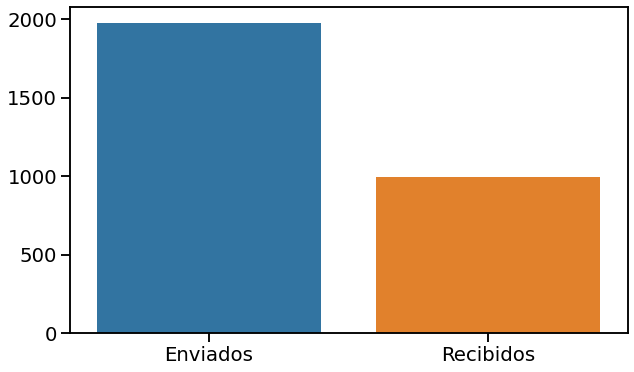

In [175]:
time_genN = dataNew['vectime'].loc[[23]].tolist()
packets_genN = dataNew['vecvalue'].loc[[23]].tolist()
time_sinkN = dataNew['vectime'].loc[[28]].tolist()
packets_sinkN = dataNew['vecvalue'].loc[[28]].tolist()

time_nodeRx_queueN = dataNew['vectime'].loc[[29]].tolist()
lost_nodeRx_queueN = dataNew['vecvalue'].loc[[29]].tolist()

#dividiendo en listas
time_genN = list(map(float, time_genN[0].split()))
packets_sinkN = list(map(float, packets_sinkN[0].split()))
time_sinkN = list(map(float, time_sinkN[0].split()))
packets_genN = list(map(float, packets_genN[0].split()))

plt.figure(figsize=(10, 6))
seaborn.barplot(
    x=['Enviados', 'Recibidos'],
    y=[len(packets_genN), len(packets_sinkN)])
print(len(packets_genN))
print(len(packets_sinkN))


### Se recibieron la misma cantidad de paquetes pero ahora no se perdio ninguno.


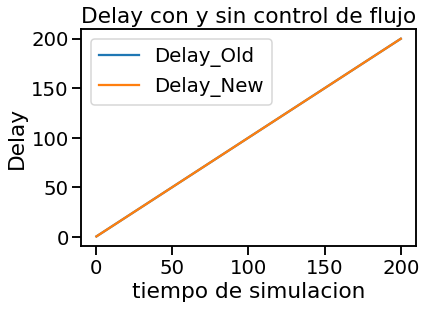

In [176]:
time_delayN = dataNew['vectime'].loc[[27]].tolist()
time_delayO = dataOld['vectime'].loc[[27]].tolist()

delayN = dataNew['vectime'].loc[[27]].tolist()
delayO = dataOld['vectime'].loc[[27]].tolist()

time_DelayO = list(map(float, (time_delayO[0]).split()))
time_DelayN = list(map(float, (time_delayN[0]).split()))
delayN = list(map(float, (delayN[0]).split()))
delayO = list(map(float, (delayO[0]).split()))

figure, axis = plt.subplots(1, 1)
plt.plot(time_DelayO, delayO, color='tab:blue', label="Delay_Old")
plt.plot(time_DelayN, delayN, color='tab:orange', label="Delay_New")
plt.title('Delay con y sin control de flujo')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Delay")
plt.legend()
plt.show()

### Son iguales los delays de los paquetes recibidos.

## Caso 2: Congestion

In [177]:
#Configuracion inicial
import matplotlib.pyplot as plt  #librería para graficas de python
import numpy  # extiende las librerias de matemática de python
import pandas  #libreria para procesamiento de datos muy usada en la industria
import seaborn  # Extiende las funcionalidades de matplotlib, muy usado en data visualization

# Con esto hacemos los gráficos más grandes, adecuados para el proyector.
seaborn.set_context(context='talk', font_scale=1.2)

dataOld = pandas.read_csv('data/lab3_case2_1.csv')
dataNew = pandas.read_csv('data/lab3_case2_2.csv')

dataOld


,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,datetime,20220802-08:23:26,NaN,NaN
2,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,datetimef,20220802-082326,NaN,NaN
3,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20220802-08:23:26-62226,runattr,NaN,NaN,network,Network,NaN,NaN


In [178]:
dataNew

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
0,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,configname,General,NaN,NaN
1,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,datetime,20220730-16:29:00,NaN,NaN
2,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,datetimef,20220730-162900,NaN,NaN
3,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,experiment,General,NaN,NaN
4,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,inifile,omnetpp.ini,NaN,NaN
5,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,iterationvars,NaN,NaN,NaN
6,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,iterationvarsd,NaN,NaN,NaN
7,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,iterationvarsf,NaN,NaN,NaN
8,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,measurement,NaN,NaN,NaN
9,General-0-20220730-16:29:00-21948,runattr,NaN,NaN,network,Network,NaN,NaN


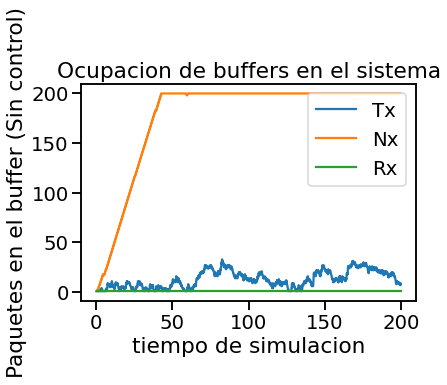

In [179]:
time_genO = dataOld['vectime'].loc[[24]].tolist()
buffer_genO = dataOld['vecvalue'].loc[[24]].tolist()

time_queueO = dataOld['vectime'].loc[[25]].tolist()
buffer_queueO = dataOld['vecvalue'].loc[[25]].tolist()

time_sinkO = dataOld['vectime'].loc[[26]].tolist()
buffer_sinkO = dataOld['vecvalue'].loc[[26]].tolist()

time_genO = list(map(float, (time_genO[0]).split()))
time_queueO = list(map(float, (time_queueO[0]).split()))
time_sinkO = list(map(float, (time_sinkO[0]).split()))
buffer_genO = list(map(float, (buffer_genO[0]).split()))
buffer_queueO = list(map(float, (buffer_queueO[0]).split()))
buffer_sinkO = list(map(float, (buffer_sinkO[0]).split()))

figure, axis = plt.subplots(1, 1)
plt.plot(time_genO, buffer_genO, color='tab:blue', label="Tx")
plt.plot(time_queueO, buffer_queueO, color='tab:orange', label="Nx")
plt.plot(time_sinkO, buffer_sinkO, color='tab:green', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Paquetes en el buffer (Sin control)")
plt.legend()
plt.show()


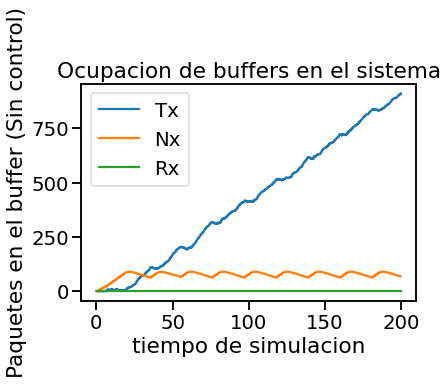

In [180]:
time_genN = dataNew['vectime'].loc[[24]].tolist()
buffer_genN = dataNew['vecvalue'].loc[[24]].tolist()

time_queueN = dataNew['vectime'].loc[[25]].tolist()
buffer_queueN = dataNew['vecvalue'].loc[[25]].tolist()

time_sinkN = dataNew['vectime'].loc[[26]].tolist()
buffer_sinkN = dataNew['vecvalue'].loc[[26]].tolist()

time_genN = list(map(float, (time_genN[0]).split()))
time_queueN = list(map(float, (time_queueN[0]).split()))
time_sinkN = list(map(float, (time_sinkN[0]).split()))
buffer_genN = list(map(float, (buffer_genN[0]).split()))
buffer_queueN = list(map(float, (buffer_queueN[0]).split()))
buffer_sinkN = list(map(float, (buffer_sinkN[0]).split()))

figure, axis = plt.subplots(1, 1)
plt.plot(time_genN, buffer_genN, color='tab:blue', label="Tx")
plt.plot(time_queueN, buffer_queueN, color='tab:orange', label="Nx")
plt.plot(time_sinkN, buffer_sinkN, color='tab:green', label="Rx")
plt.title('Ocupacion de buffers en el sistema')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Paquetes en el buffer (Sin control)")
plt.legend()
plt.show()

### Al ser muy similares en funcionanmiento el algoritmo de flujo y congestion, vemos un efecto similar en el grafico. Para este caso en la cola intermediaria.

1979
998
771


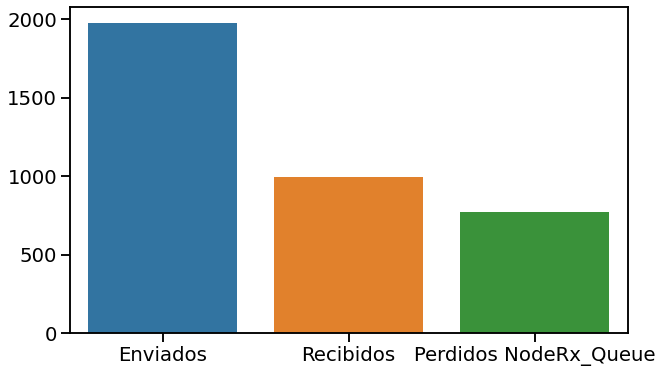

In [181]:
time_genO = dataOld['vectime'].loc[[23]].tolist()
packets_genO = dataOld['vecvalue'].loc[[23]].tolist()
time_sinkO = dataOld['vectime'].loc[[28]].tolist()
packets_sinkO = dataOld['vecvalue'].loc[[28]].tolist()

time_queueO = dataOld['vectime'].loc[[29]].tolist()
lost_queueO = dataOld['vecvalue'].loc[[29]].tolist()

#dividiendo en listas
time_genO = list(map(float, time_genO[0].split()))
packets_sinkO = list(map(float, packets_sinkO[0].split()))
time_sinkO = list(map(float, time_sinkO[0].split()))
packets_genO = list(map(float, packets_genO[0].split()))

time_queueO = list(map(float, time_queueO[0].split()))
lost_queueO = list(map(float, lost_queueO[0].split()))

plt.figure(figsize=(10, 6))
seaborn.barplot(
    x=['Enviados', 'Recibidos','Perdidos NodeRx_Queue'],
    y=[len(packets_genO), len(packets_sinkO),len(lost_queueO)])
print(len(packets_genO))
print(len(packets_sinkO))
print(len(lost_queueO))

1979
998


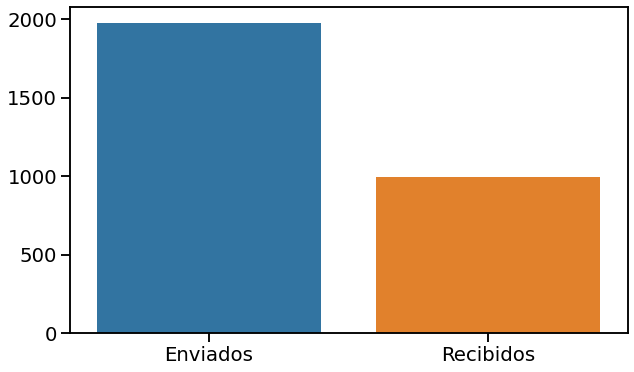

In [182]:
time_genN = dataNew['vectime'].loc[[23]].tolist()
packets_genN = dataNew['vecvalue'].loc[[23]].tolist()
time_sinkN = dataNew['vectime'].loc[[28]].tolist()
packets_sinkN = dataNew['vecvalue'].loc[[28]].tolist()

#dividiendo en listas
time_genN = list(map(float, time_genN[0].split()))
packets_sinkN = list(map(float, packets_sinkN[0].split()))
time_sinkN = list(map(float, time_sinkN[0].split()))
packets_genN = list(map(float, packets_genN[0].split()))

plt.figure(figsize=(10, 6))
seaborn.barplot(
    x=['Enviados', 'Recibidos'],
    y=[len(packets_genN), len(packets_sinkN)])
print(len(packets_genN))
print(len(packets_sinkN))

### Tampoco se pierden paquetes con este algoritmo de control congestion.

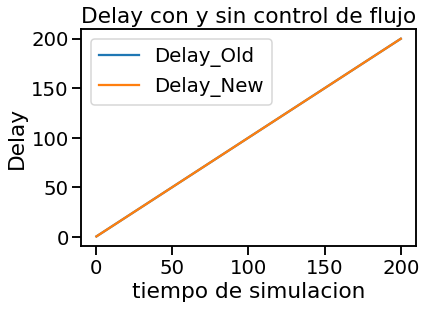

In [183]:
time_delayN = dataNew['vectime'].loc[[27]].tolist()
time_delayO = dataOld['vectime'].loc[[27]].tolist()

delayN = dataNew['vectime'].loc[[27]].tolist()
delayO = dataOld['vectime'].loc[[27]].tolist()

time_DelayO = list(map(float, (time_delayO[0]).split()))
time_DelayN = list(map(float, (time_delayN[0]).split()))
delayN = list(map(float, (delayN[0]).split()))
delayO = list(map(float, (delayO[0]).split()))

figure, axis = plt.subplots(1, 1)
plt.plot(time_DelayO, delayO, color='tab:blue', label="Delay_Old")
plt.plot(time_DelayN, delayN, color='tab:orange', label="Delay_New")
plt.title('Delay con y sin control de flujo')
plt.xlabel("tiempo de simulacion")
plt.ylabel("Delay")
plt.legend()
plt.show()


## Discusión.

Algunas variables presentadas como EMERGENCY_PERCENT_BUFF,FLOW_DELAY_RATE,FLOW_TIMER,etc. podrían ser automáticamente calibradas, en vez de estéticamente para los escenarios de laboratorio. Idealmente en base a las métricas de la conexión (datarate, propagación) recolectadas usando al. Conocer datos como el mínimo tamaño de buffer en la sub-red para la congestión, personalmente empezaría investigando esto en base a la tecnología mas vieja que se sigue usando en la infraestructura de la internet.
El algoritmo de control de flujo esta basado en un algoritmo de control de congestión de la capa de red, que enviá paquetes de emergencia al emisor cuando el buffer llega a cierta utilización.

## Referencias.

https://famaf.aulavirtual.unc.edu.ar/course/view.php?id=880

